In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_1=pd.read_csv('./Arthritis.csv')
#data_1.set_index('Participant',inplace=True)

In [3]:
data_1.head()

,Participant,Gender,Initial,3mo,6mo,9mo,12mo
0,1,M,5,5,4,4,3
1,2,M,5,3,3,4,3
2,3,M,6,5,5,4,3
3,4,M,8,7,5,6,5
4,5,M,4,4,5,4,4


In [4]:
data_1.columns

Index(['Participant', 'Gender', 'Initial', '3mo', '6mo', '9mo', '12mo'], dtype='object')

In [5]:
import scipy.stats as stats
stats.f_oneway(data_1['Initial'],data_1['3mo'],
               data_1['6mo'],data_1['9mo'],
              data_1['12mo'])

F_onewayResult(statistic=10.406351968675224, pvalue=6.582909161019796e-07)

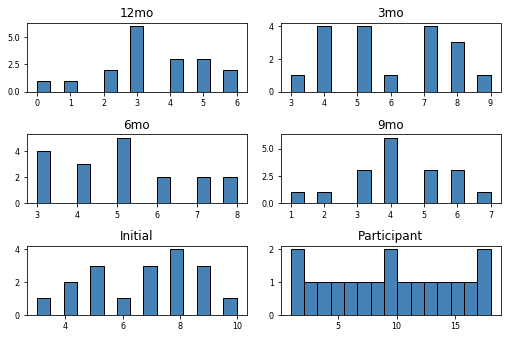

In [6]:
data_1.hist(bins=15,color='steelblue',edgecolor='black',linewidth=1.0,
         xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

In [7]:
data_1.head()

,Participant,Gender,Initial,3mo,6mo,9mo,12mo
0,1,M,5,5,4,4,3
1,2,M,5,3,3,4,3
2,3,M,6,5,5,4,3
3,4,M,8,7,5,6,5
4,5,M,4,4,5,4,4


In [144]:
del data_1['Participant']

In [145]:
data_1.groupby('Gender').mean()

,Initial,3mo,6mo,9mo,12mo
Gender,,,,,
F,8.125,6.875,5.625,4.25,3.375
M,5.700,5.100,4.600,4.20,3.500


Text(0.5, 1.0, 'Men Vs Women Pain Level Influenced at GNO44')

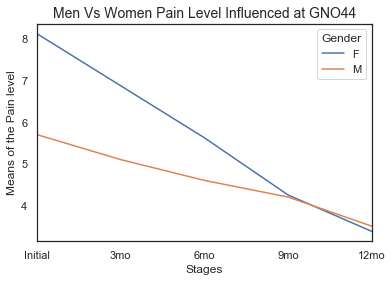

In [148]:

data_1.groupby('Gender').mean().transpose().plot();
plt.xlabel('Stages',fontsize=12)
plt.ylabel('Means of the Pain level',fontsize=12)
plt.title("Men Vs Women Pain Level Influenced at GNO44",fontsize=14 )

In [8]:
data1_des=data_1.describe()
data1_des

,Participant,Initial,3mo,6mo,9mo,12mo
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,6.777778,5.888889,5.055556,4.222222,3.444444
std,5.338539,2.045240,1.778595,1.661757,1.516791,1.616904
min,1.000000,3.000000,3.000000,3.000000,1.000000,0.000000
25%,5.250000,5.000000,4.250000,4.000000,3.250000,3.000000
50%,9.500000,7.000000,5.500000,5.000000,4.000000,3.000000
75%,13.750000,8.000000,7.000000,6.000000,5.000000,4.750000
max,18.000000,10.000000,9.000000,8.000000,7.000000,6.000000


In [9]:
data1_des.iloc[2,1:6]

Initial    2.045240
3mo        1.778595
6mo        1.661757
9mo        1.516791
12mo       1.616904
Name: std, dtype: float64

In [10]:

data1_temp= pd.DataFrame({"Month":data1_des.columns[1:],
                  'STD':data1_des.iloc[2,1:6],
                         'mean':data1_des.iloc[1,1:6]})
data1_temp

,Month,STD,mean
Initial,Initial,2.045240,6.777778
3mo,3mo,1.778595,5.888889
6mo,6mo,1.661757,5.055556
9mo,9mo,1.516791,4.222222
12mo,12mo,1.616904,3.444444


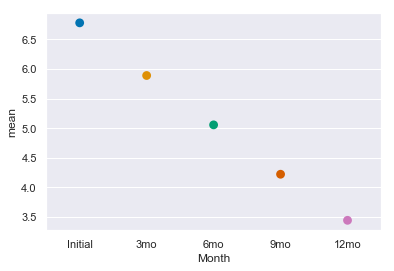

In [11]:
sns.set()
sns.pointplot(data=data1_temp, x='Month', y='mean', ci='STD',
              dodge=True, 
              markers=['o', 's'],capsize=.1, errwidth=1, palette='colorblind')

In [12]:
data2=pd.read_csv('./aids.csv')
data2.set_index('patient',drop=True)
data2.head()

,patient,Time,death,drug,CD4
0,1,16.97,0,ddC,10.677078
1,2,19.00,0,ddI,6.324555
2,3,18.53,1,ddI,3.464102
3,4,12.70,0,ddC,3.872983
4,5,15.13,0,ddI,7.280110


In [13]:
np.exp(-0.4929)*-0.4929

-0.3010891239295719

In [14]:
data_3=pd.read_csv('Hodgkins Data.csv').reset_index(drop=True)
data_3.head()

,alive5yr,stage,age,rbc,gender,HIV.mono,wbc
0,N,I,60,3.247847,F,N,10125.821270
1,N,I,46,4.218159,M,N,12210.810690
2,N,I,32,0.086400,M,N,9804.162876
3,N,I,44,3.018740,F,N,11271.048720
4,N,I,44,1.553694,M,Y,9566.026899


In [15]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
alive5yr    342 non-null object
stage       342 non-null object
age         342 non-null int64
rbc         342 non-null float64
gender      342 non-null object
HIV.mono    342 non-null object
wbc         342 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 18.8+ KB


In [16]:
data_3.describe()

,age,rbc,wbc
count,342.000000,342.000000,342.000000
mean,27.257310,3.337248,9509.424869
std,16.085125,1.523673,1418.563816
min,5.000000,-0.960353,5776.473979
25%,14.000000,2.421154,8534.999460
50%,25.000000,3.322342,9373.140860
75%,38.000000,4.324605,10436.144512
max,73.000000,7.400833,14671.851790


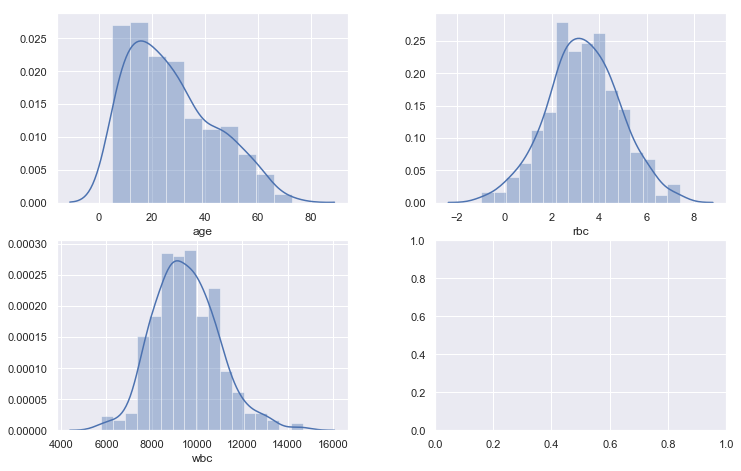

In [17]:
#checking the histgram of the numeric features
f,axes=plt.subplots(2,2,figsize=(12,8))
f.subplots_adjust(top=0.85,wspace=0.3)
sns.distplot(data_3['age'],ax=axes[0,0]);
sns.distplot(data_3['rbc'],ax=axes[0,1]);
sns.distplot(data_3['wbc'],ax=axes[1,0]);

In [18]:
data_3.columns

Index(['alive5yr', 'stage', 'age', 'rbc', 'gender', 'HIV.mono', 'wbc'], dtype='object')

In [19]:
x_index=['stage', 'age', 'rbc', 'gender', 'HIV.mono', 'wbc']
y_index=['alive5yr']
x_features=pd.get_dummies(data_3[x_index],drop_first=True)
y_features=pd.get_dummies(data_3[y_index],drop_first=True)

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y_features,x_features).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             alive5yr_Y   No. Observations:                  342
Model:                          Logit   Df Residuals:                      334
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 May 2019   Pseudo R-squ.:                     inf
Time:                        01:00:46   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0321      0.010     -3.203      0.001      -0.052      -0.012
rbc            0.7392      0.114  

/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [21]:
#model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_features, 
                                 logit_model.predict(
                                 x_features))

In [126]:
auc = roc_auc_score(y_features, logit_model.predict(
                                 x_features))
print('AUC: %.3f' % auc)

AUC: 0.825


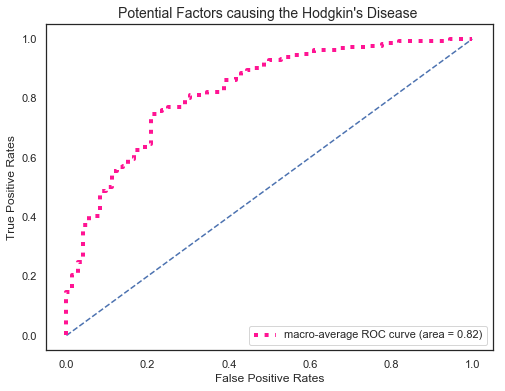

In [129]:
plt.figure(figsize=(8,6))
pyplot.plot([0, 1], [0, 1], linestyle='--')
#pyplot.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rates',fontsize=12)
plt.ylabel('True Positive Rates',fontsize=12)
plt.title("Potential Factors causing the Hodgkin's Disease ",fontsize=14 )


plt.plot(fpr, tpr,label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(auc),
         color='deeppink', linestyle=':', linewidth=4)

plt.legend(loc="lower right")
pyplot.show()

In [24]:
dict={'odds_ratio':np.exp(logit_model.params),'CI:0':
     np.exp(logit_model.conf_int())[0],
     'CI:1':np.exp(logit_model.conf_int())[1]}

In [25]:
pd.DataFrame(dict)

,odds_ratio,CI:0,CI:1
age,0.968447,0.949630,0.987637
rbc,2.094325,1.674067,2.620084
wbc,1.000038,0.999936,1.000141
stage_II,1.775467,0.737382,4.274968
stage_III,0.832011,0.361738,1.913654
stage_IV,0.193116,0.080563,0.462917
gender_M,0.991206,0.537447,1.828066
HIV.mono_Y,0.227815,0.081749,0.634867


In [26]:
x_features.columns

Index(['age', 'rbc', 'wbc', 'stage_II', 'stage_III', 'stage_IV', 'gender_M',
       'HIV.mono_Y'],
      dtype='object')

In [27]:
x_features.shape

(342, 8)

In [28]:
x_features.head()

,age,rbc,wbc,stage_II,stage_III,stage_IV,gender_M,HIV.mono_Y
0,60,3.247847,10125.821270,0,0,0,0,0
1,46,4.218159,12210.810690,0,0,0,1,0
2,32,0.086400,9804.162876,0,0,0,1,0
3,44,3.018740,11271.048720,0,0,0,0,0
4,44,1.553694,9566.026899,0,0,0,1,1


In [29]:
case=({'age':33,'rbc':4.3,'wbc':12000,'stage_II':0,'stage_III':0, 'stage_IV':0, 'gender_M':1,'HIV.mono_Y':0})

case=pd.DataFrame(case,index=[0])

#x_features.loc[342]={33,4.3,1200,0,0,0,1}

In [30]:
proba=logit_model.predict(case)
proba

0    0.92909
dtype: float64

In [31]:
np.exp(0.93)

2.534509177617855

In [32]:
2.53/3.53

0.71671388101983

In [33]:
data4=pd.read_csv('./Weight.csv')

In [34]:
data4.describe()

,weight
count,472.000000
mean,158.692797
std,21.767272
min,100.000000
25%,141.000000
50%,159.000000
75%,175.000000
max,209.000000


In [35]:
data4.columns

Index(['weight'], dtype='object')

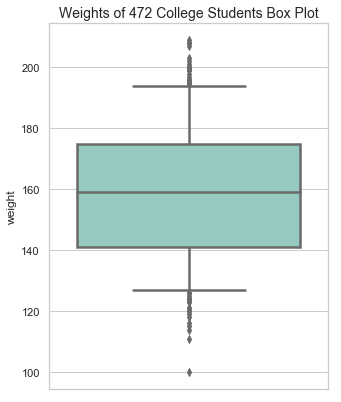

In [125]:
fig=plt.figure(figsize=(5,7))
sns.set_style('whitegrid')
sns.boxplot(y='weight',
            data=data4,palette='Set3',linewidth=2.5,whis=[5, 95])
fig.subplots_adjust(top=0.85,wspace=0.3)
plt.title('Weights of 472 College Students Box Plot',fontsize=14)
ax.set_xlabel('Students',fontsize=12)
ax.set_ylabel('Weight: Lbs')
sns.set(style="white", color_codes=True)
plt.show()

In [37]:
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [38]:
mean_confidence_interval(data4,confidence=0.95)

(158.6927966101695, array([156.72401057]), array([160.66158265]))

TypeError: 'set' object is not callable

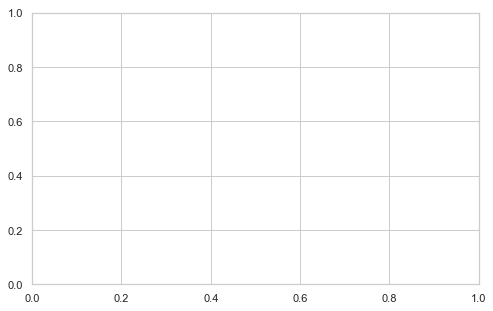

In [39]:
dict = {...}
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
boxplots = ax.boxplot(data4,
           notch = True,
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('area_mean', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

In [103]:
data5=pd.read_csv('./Leukemia.csv')

In [104]:
data5.head()

,Group,Result,Time,logWBC
0,A,Death,6,2.31
1,A,Death,6,4.06
2,A,Death,6,3.28
3,A,Death,7,4.43
4,A,Death,10,2.96


In [105]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
Group     44 non-null object
Result    44 non-null object
Time      44 non-null int64
logWBC    44 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [106]:
data5['Result']=data5['Result'].apply(lambda x:0 if x=='Death'else 1)

In [107]:
data5.head()

,Group,Result,Time,logWBC
0,A,0,6,2.31
1,A,0,6,4.06
2,A,0,6,3.28
3,A,0,7,4.43
4,A,0,10,2.96


In [108]:
data5['Group'].unique()

array(['A', 'B'], dtype=object)

In [109]:
#pip install lifelines

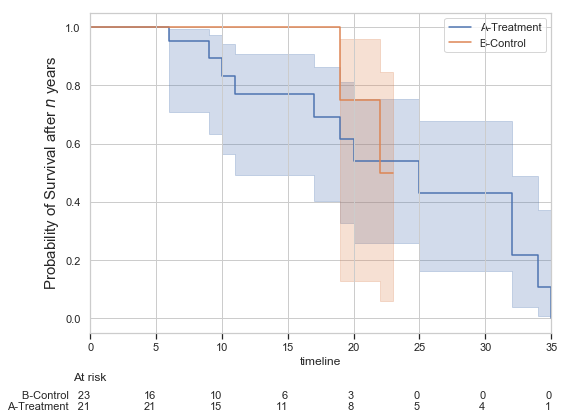

In [111]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes


T=data5['Time']
E=data5['Result']
groups=data5['Group']
ix1 = (groups == 'A')   ## Cohort 1
ix2 = (groups == 'B') ## cohort 2
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
ax = plt.subplot(111)
plt.ylabel('Probability of Survival after $n$ years',fontsize=15)

kmf_control = KaplanMeierFitter()
kmf_treatment= KaplanMeierFitter()
ax=kmf_treatment.fit(T[ix1], E[ix1], label='A-Treatment').plot(ax=ax)    ## fit the cohort 1 data
#ax = kmf.fit(waltons.loc[ix]['T'], waltons.loc[ix]['E'], label='control').plot(ax=ax)


ax=kmf_control.fit(T[ix2], E[ix2], label='B-Control').plot(ax=ax)      ## fit the cohort 2 data

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_control, kmf_treatment, ax=ax);

In [112]:
kmf_control.median_,kmf_treatment.median_

(22.0, 25.0)